1 Fit the logistic regression classifier to your training sample and transform, 
i.e. make predictions on the training sample

2 Evaluate your in-sample results using the model score, confusion matrix, and classification report.

3 Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, 
false negative rate, precision, recall, f1-score, and support.

4 Look in the scikit-learn documentation to research the solver parameter. 
What is your best option(s) for the particular problem you are trying to solve and the data to be used?

5 Run through steps 2-4 using another solver (from question 5)
Which performs better on your in-sample data?

In [1]:
#plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


#modeling imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import get_iris_data
from prepare import prep_iris
from acquire import get_titanic_data

In [2]:
#1 Fit the logistic regression classifier to your training sample and transform, 
#i.e. make predictions on the training sample

In [3]:
#import and clean iris data
df = prep_iris(get_iris_data())
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#split the data into 70/30 train/test groups for x and y
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df[['species']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=123)

In [5]:
# Fit logistic regression clasifier onto training samples and transform
logit=LogisticRegression(C=1,class_weight='balanced',random_state=123,solver='saga')
logit.fit(x_train,y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# generate predictions
y_pred = logit.predict(x_train)
y_pred_proba=logit.predict_proba(x_train)

y_pred_proba[:5]

array([[1.06581048e-03, 2.85360763e-01, 7.13573426e-01],
       [1.07334021e-03, 2.41758386e-01, 7.57168273e-01],
       [1.88099190e-02, 6.48735010e-01, 3.32455071e-01],
       [8.64033177e-01, 1.35935117e-01, 3.17061926e-05],
       [7.65439950e-01, 2.34438034e-01, 1.22016286e-04]])

In [7]:
# Evaluate in-sample results using the model score, confusion matrix, and classification report

In [8]:
# print model score
print('Accuracy of Logistic regression on training set: {:.2f}'.format(logit.score(x_train,y_train)))

Accuracy of Logistic regression on training set: 0.96


In [9]:
# print confution martix

print(confusion_matrix(y_train,y_pred))

[[32  0  0]
 [ 0 37  3]
 [ 0  1 32]]


In [10]:
# import numpy as np
# confusion_matrix = confusion_matrix(y_train,y_pred)
# # Sec calcs
# FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
# FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
# TP = np.diag(confusion_matrix)
# TN = confusion_matrix.sum() - (FP + FN + TP)

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)

# # Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)

In [11]:
# generate classifiaction report
cr=(classification_report(y_train,y_pred,output_dict=True))
cr

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32},
 'versicolor': {'precision': 0.9736842105263158,
  'recall': 0.925,
  'f1-score': 0.9487179487179489,
  'support': 40},
 'virginica': {'precision': 0.9142857142857143,
  'recall': 0.9696969696969697,
  'f1-score': 0.9411764705882354,
  'support': 33},
 'accuracy': 0.9619047619047619,
 'macro avg': {'precision': 0.96265664160401,
  'recall': 0.9648989898989898,
  'f1-score': 0.9632981397687281,
  'support': 105},
 'weighted avg': {'precision': 0.9630361618331543,
  'recall': 0.9619047619047619,
  'f1-score': 0.9619765855059974,
  'support': 105}}

In [12]:
# Fit data to regression to new solver
logit=LogisticRegression(C=1,class_weight='balanced',random_state=123,solver='liblinear')
logit.fit(x_train,y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# generate predictions
y_pred = logit.predict(x_train)
y_pred_proba=logit.predict_proba(x_train)

y_pred_proba[:5]

array([[8.73154083e-04, 2.15635131e-01, 7.83491715e-01],
       [8.97359857e-04, 1.76734891e-01, 8.22367749e-01],
       [1.67572589e-02, 6.35328913e-01, 3.47913829e-01],
       [8.96226906e-01, 1.03746789e-01, 2.63054825e-05],
       [8.13687747e-01, 1.86187330e-01, 1.24922605e-04]])

In [14]:
# print confution martix
print(confusion_matrix(y_train,y_pred))

[[32  0  0]
 [ 0 36  4]
 [ 0  1 32]]


In [15]:
# generate classifiaction report
cr=(classification_report(y_train,y_pred,output_dict=True))
cr

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32},
 'versicolor': {'precision': 0.972972972972973,
  'recall': 0.9,
  'f1-score': 0.935064935064935,
  'support': 40},
 'virginica': {'precision': 0.8888888888888888,
  'recall': 0.9696969696969697,
  'f1-score': 0.927536231884058,
  'support': 33},
 'accuracy': 0.9523809523809523,
 'macro avg': {'precision': 0.953953953953954,
  'recall': 0.9565656565656565,
  'f1-score': 0.9542003889829976,
  'support': 105},
 'weighted avg': {'precision': 0.9547833547833547,
  'recall': 0.9523809523809523,
  'f1-score': 0.9524885052835362,
  'support': 105}}

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, 

false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using entropy as your measure of impurity.

Which performs better on your in-sample data?

In [16]:
import pandas as pd
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydataset import data

In [17]:
# get fresh iris data 
df_iris=data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [18]:
#replace . with _ in colomns
df_iris.columns=[col.lower().replace('.','_') for col in df_iris]

In [19]:
# create x and y data sets then split into test and train
X=df_iris.drop(['species'],axis=1)
y=df_iris[['species']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [20]:
# create decition tree object
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)
# fit data to object
clf.fit(X_train,y_train)
# create predictions
y_pred=clf.predict(X_train)
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ]])

In [21]:
# print model score
print('Accuracy of Logistic regression on training set: {:.2f}'.format(logit.score(x_train,y_train)))

Accuracy of Logistic regression on training set: 0.95


In [22]:
# generate classifiaction report
cr=(classification_report(y_train,y_pred,output_dict=True))
cr

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32},
 'versicolor': {'precision': 0.9523809523809523,
  'recall': 1.0,
  'f1-score': 0.975609756097561,
  'support': 40},
 'virginica': {'precision': 1.0,
  'recall': 0.9393939393939394,
  'f1-score': 0.96875,
  'support': 33},
 'accuracy': 0.9809523809523809,
 'macro avg': {'precision': 0.9841269841269842,
  'recall': 0.9797979797979798,
  'f1-score': 0.9814532520325203,
  'support': 105},
 'weighted avg': {'precision': 0.981859410430839,
  'recall': 0.9809523809523809,
  'f1-score': 0.9808870499419281,
  'support': 105}}

In [23]:
# generate confusion matrix
confusion_matrix(y_train,y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [24]:
# print model score
print('Accuracy of Logistic regression on training set: {:.2f}'.format(logit.score(x_train,y_train)))

Accuracy of Logistic regression on training set: 0.95


In [25]:
# create decition tree object
clf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=123)
# fit data to object
clf.fit(X_train,y_train)
# create predictions
y_pred=clf.predict(X_train)
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba[:5]

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ]])

In [26]:
# print model score
print('Accuracy of Logistic regression on training set: {:.2f}'.format(logit.score(x_train,y_train)))

Accuracy of Logistic regression on training set: 0.95


In [27]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
# object 
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)
# train
rf.fit(x_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [29]:
print(rf.feature_importances_)

[0.08980597 0.0198138  0.44366243 0.44671781]


In [30]:
# estimate survive or not
y_pred = rf.predict(x_train)
# estimate probability of survival
y_pred_proba = rf.predict_proba(x_train)

In [31]:
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 1.00


In [32]:
print(confusion_matrix(y_train,y_pred))

[[32  0  0]
 [ 0 40  0]
 [ 0  0 33]]


In [33]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [34]:

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [35]:
print(rf.feature_importances_)

[0.08647229 0.00786147 0.45520172 0.45046453]


In [36]:
# estimate survive or not
y_pred = rf.predict(x_train)
# estimate probability of survival
y_pred_proba = rf.predict_proba(x_train)

In [37]:
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.96


In [38]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.93      0.95        40
   virginica       0.91      0.97      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [39]:
print(confusion_matrix(y_train,y_pred))

[[32  0  0]
 [ 0 37  3]
 [ 0  1 32]]


First model is 100% accurate and likely overfit

Second model is 96% accurate and likely the better choice due to not being over fit

**Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)**

**Evaluate your results using the model score, confusion matrix, and classification report.**

**Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**

**Run through steps 2-4 setting k to 10**

**Run through setps 2-4 setting k to 20**

**What are the differences in the evaluation metrics? Which performs better on your in-sample data? 
Why? TestFor both the iris and the titanic data,**

**Determine which model (with hyperparameters) performs the best (try reducing the number of features to the top 4 features in terms of information gained for each feature individually).
Create a new dataframe with top 4 features.**

**Use the top performing algorithm with the metaparameters used in that model. Create the object, fit, transform on in-sample data, and evaluate the results with the training data. Compare your evaluation metrics with those from the original model (with all the features).**

**Run your final model on your out-of-sample dataframe (test_df). Evaluate the results.**

**Titanic Data
Create a feature named who, this should be either man, woman, or child. How does including this feature affect your model's performance?**

**Create a feature named adult_male that is either a 1 or a 0. How does this affect your model's predictions?**

**Iris Data
Create features named petal_area and sepal_area.**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
#Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [41]:
# create object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit data to object
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
print(rf.feature_importances_)

[0.08647229 0.00786147 0.45520172 0.45046453]


In [43]:
# estimate survive or not
y_pred = rf.predict(x_train)
# estimate probability of survival
y_pred_proba = rf.predict_proba(x_train)

In [44]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.98


In [45]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 37  3]
 [ 0  1 32]]


In [46]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.93      0.95        40
   virginica       0.91      0.97      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [47]:
# create object
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
# fit data to object
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [48]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.97


In [49]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 37  3]
 [ 0  1 32]]


In [50]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.93      0.95        40
   virginica       0.91      0.97      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [51]:
# create object
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
# fit data to object
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [52]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.96


In [53]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 37  3]
 [ 0  1 32]]


In [54]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.93      0.95        40
   virginica       0.91      0.97      0.94        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



Range in accuracy from lowest model to the highest is .02

.96 model least risk of overfitting

Determine which model (with hyperparameters) performs the best (try reducing the number of features to the top 4 features in terms of information gained for each feature individually).

Create a new dataframe with top 4 features.

Use the top performing algorithm with the metaparameters used in that model. Create the object, fit, transform on in-sample data, and evaluate the results with the training data. Compare your evaluation metrics with those from the original model (with all the features).

Run your final model on your out-of-sample dataframe (test_df). Evaluate the results.

In [55]:
# create object
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
# fit data to object
knn.fit(x_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [56]:
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.98


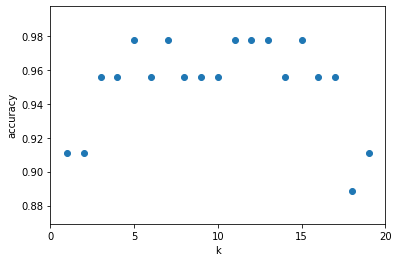

In [57]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [58]:
#import and clean iris data
df = prep_iris(get_iris_data())
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
df['petal_area']=df.petal_length*df.petal_width
df['sepal_area']=df.sepal_length*df.sepal_width
df_area = df
df_area.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


In [60]:
X_train = df_area.drop(columns='species')
y_train = df_area.species

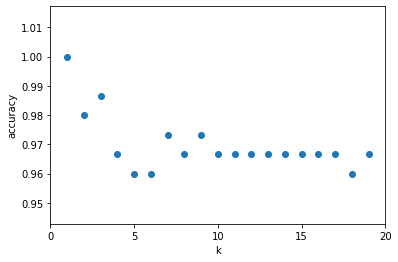

In [61]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [62]:
X_train = df_area[['sepal_area','petal_area']]
y_train = df_area.species

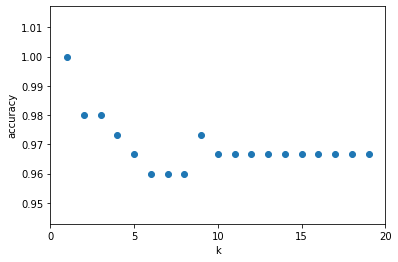

In [63]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [65]:
df_titanic = get_titanic_data()
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [73]:
df_titanic['who'] = df_titanic.sex[df_titanic.age>18]
df_titanic.who.replace(np.nan,'child',inplace=True)

In [74]:
df_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,who
0,0,0,3,male,22.00,1,0,7.2500,S,Third,None,Southampton,0,male
1,1,1,1,female,38.00,1,0,71.2833,C,First,C,Cherbourg,0,female
2,2,1,3,female,26.00,0,0,7.9250,S,Third,None,Southampton,1,female
3,3,1,1,female,35.00,1,0,53.1000,S,First,C,Southampton,0,female
4,4,0,3,male,35.00,0,0,8.0500,S,Third,None,Southampton,1,male
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,None,Queenstown,1,child
6,6,0,1,male,54.00,0,0,51.8625,S,First,E,Southampton,1,male
7,7,0,3,male,2.00,3,1,21.0750,S,Third,None,Southampton,0,child
8,8,1,3,female,27.00,0,2,11.1333,S,Third,None,Southampton,0,female
9,9,1,2,female,14.00,1,0,30.0708,C,Second,None,Cherbourg,0,child
